#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df_json = pd.read_json(url)
df_json.sample(3)

,customerID,Churn,customer,phone,internet,account
1243,1775-KWJKQ,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
2715,3758-CKOQL,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
245,0365-TRTPY,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## Indetinficando tipos de datos

**Diccionario de datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [3]:
df_json.info()
df_json.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


## Transformando y limpiando datos

In [4]:
# Desglosar y concatenar datos
df_customer = pd.json_normalize(df_json['customer'])
df_phone = pd.json_normalize(df_json['phone'])
df_internet = pd.json_normalize(df_json['internet'])
df_account = pd.json_normalize(df_json['account'])

df = pd.concat([df_json[['customerID','Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1281,1842-EZJMK,Yes,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,103.7,5071.05
3646,5025-GOOKI,No,Female,0,No,No,20,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),18.9,347.65
467,0665-XHDJU,No,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Electronic check,99.4,7285.7


In [5]:
# Lista de columnas con valores unicos
columanas_nombres = df.columns.tolist()
columnas_datos_no_unicos = ['customerID','tenure','Charges.Monthly','Charges.Total']

columans_con_datos_unicos = [col for col in columanas_nombres if col not in columnas_datos_no_unicos]

# Datos unicos por columanas
for col in columans_con_datos_unicos:
    if col in df.columns:
        print(f"Valores únicos en '{col}': {df[col].unique()}")
        print(f"Conteo de valores en '{col}':\n{df[col].value_counts()}\n")
        print(f"Total de valores en '{col}': {df[col].value_counts().sum()} ------------------ \n")

Valores únicos en 'Churn': ['No' 'Yes' '']
Conteo de valores en 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Total de valores en 'Churn': 7267 ------------------ 

Valores únicos en 'gender': ['Female' 'Male']
Conteo de valores en 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

Total de valores en 'gender': 7267 ------------------ 

Valores únicos en 'SeniorCitizen': [0 1]
Conteo de valores en 'SeniorCitizen':
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Total de valores en 'SeniorCitizen': 7267 ------------------ 

Valores únicos en 'Partner': ['Yes' 'No']
Conteo de valores en 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Total de valores en 'Partner': 7267 ------------------ 

Valores únicos en 'Dependents': ['Yes' 'No']
Conteo de valores en 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Total de valores en 'Dependents': 7267 ------------------ 

Valores úni

In [6]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True) #Buscando '' al inicio, al final y remplaza por nan

print("\nVerificando valores nulos (incluyendo strings vacíos):")
print(df.isnull().sum())  # Conteo de valores nulos por columna


Verificando valores nulos (incluyendo strings vacíos):
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


Se obcerva que hay valores nulos en dos columnas de 7,267 registros
 * Churn: 224 registro presentan valores nulos
 * Charges.Total:  11 registro presentan valores nulos


In [7]:
df = df.dropna(subset=['Churn'])
print("\nVerificando valores nulos (incluyendo strings vacíos):")
print(df.isnull().sum())  # Conteo de valores nulos por columna


Verificando valores nulos (incluyendo strings vacíos):
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [8]:
print(f"Número total de filas en df: {df.shape[0]}, columanas en df: {df.shape[1]}")

cumstor_id_unicos = df['customerID'].nunique()
print(f"Número de customerID únicos: {cumstor_id_unicos}")

if df.shape[0] > cumstor_id_unicos:
    print("\nHay customerID DUPLICADOS")
else:
    print("\nTodos los customerID son UNICOS")

Número total de filas en df: 7043, columanas en df: 21
Número de customerID únicos: 7043

Todos los customerID son UNICOS


In [9]:
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
317,0459-SPZHJ,No,Male,0,Yes,Yes,63,Yes,Yes,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),83.50,5435
1069,1498-DQNRX,No,Female,0,Yes,No,29,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,573.05
2280,3178-FESZO,Yes,Female,0,No,No,1,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.25,100.25
494,0699-NDKJM,No,Female,0,Yes,No,57,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),58.75,3437.45
6485,8910-ICHIU,No,Female,0,No,No,46,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),95.65,4664.2


In [10]:
# Crear columana 'Charges.daily' a partir de 'Charges.Monthly'
df.loc[:, 'Charges.daily'] = df['Charges.Monthly'] / 30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


## Estandarización y transformación de datos

In [11]:
# Revisar los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [12]:
# Convertir customerID a string
df['customerID'] = df['customerID'].astype(str)

# Columnas categóricas
categorical_columns = [
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df[categorical_columns] = df[categorical_columns].astype('category')

# Limpiar y convertir Charges.Total a float
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Verificar los tipos de datos cambiados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   object  
 2   gender            7043 non-null   category
 3   SeniorCitizen     7043 non-null   int64   
 4   Partner           7043 non-null   object  
 5   Dependents        7043 non-null   object  
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   object  
 8   MultipleLines     7043 non-null   category
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   category
 11  OnlineBackup      7043 non-null   category
 12  DeviceProtection  7043 non-null   category
 13  TechSupport       7043 non-null   category
 14  StreamingTV       7043 non-null   category
 15  StreamingMovies   7043 non-null   category
 16  Contract          7043 non-nu

 - Estanderizacion de las columnas con valores Yes - No a binario

In [13]:
# Preparacion de los dato binarios
valores_binarios = {'Yes': 1, 'No': 0}

# Columnas que se estandarizara
comunas_binarios = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling']

# Cambio a valores binarios
df[comunas_binarios] = df[comunas_binarios].replace(valores_binarios)

df.head()

/tmp/ipython-input-193600971.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[comunas_binarios] = df[comunas_binarios].replace(valores_binarios)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

## Análisis descriptivo

In [14]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


## Gráficos

### Clientes que permanecieron y los que se dieron de baja

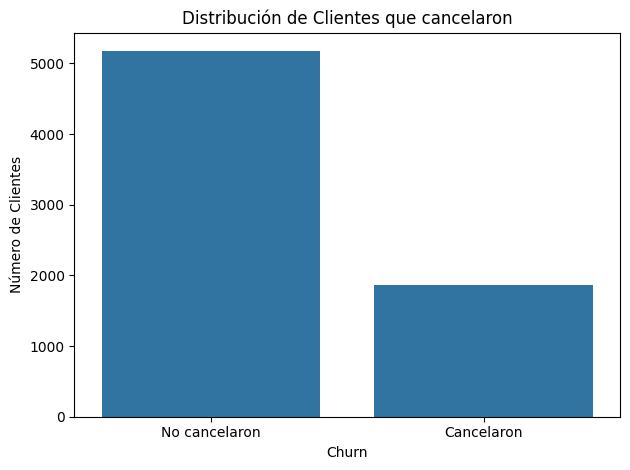

In [15]:
# Gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja
sns.countplot(x='Churn', data=df)

# Configuracion
plt.title('Distribución de Clientes que cancelaron')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No cancelaron', 'Cancelaron'])

# Ahuste del espacio
plt.tight_layout()
plt.show()

### Recuento de evasión por variables categóricas

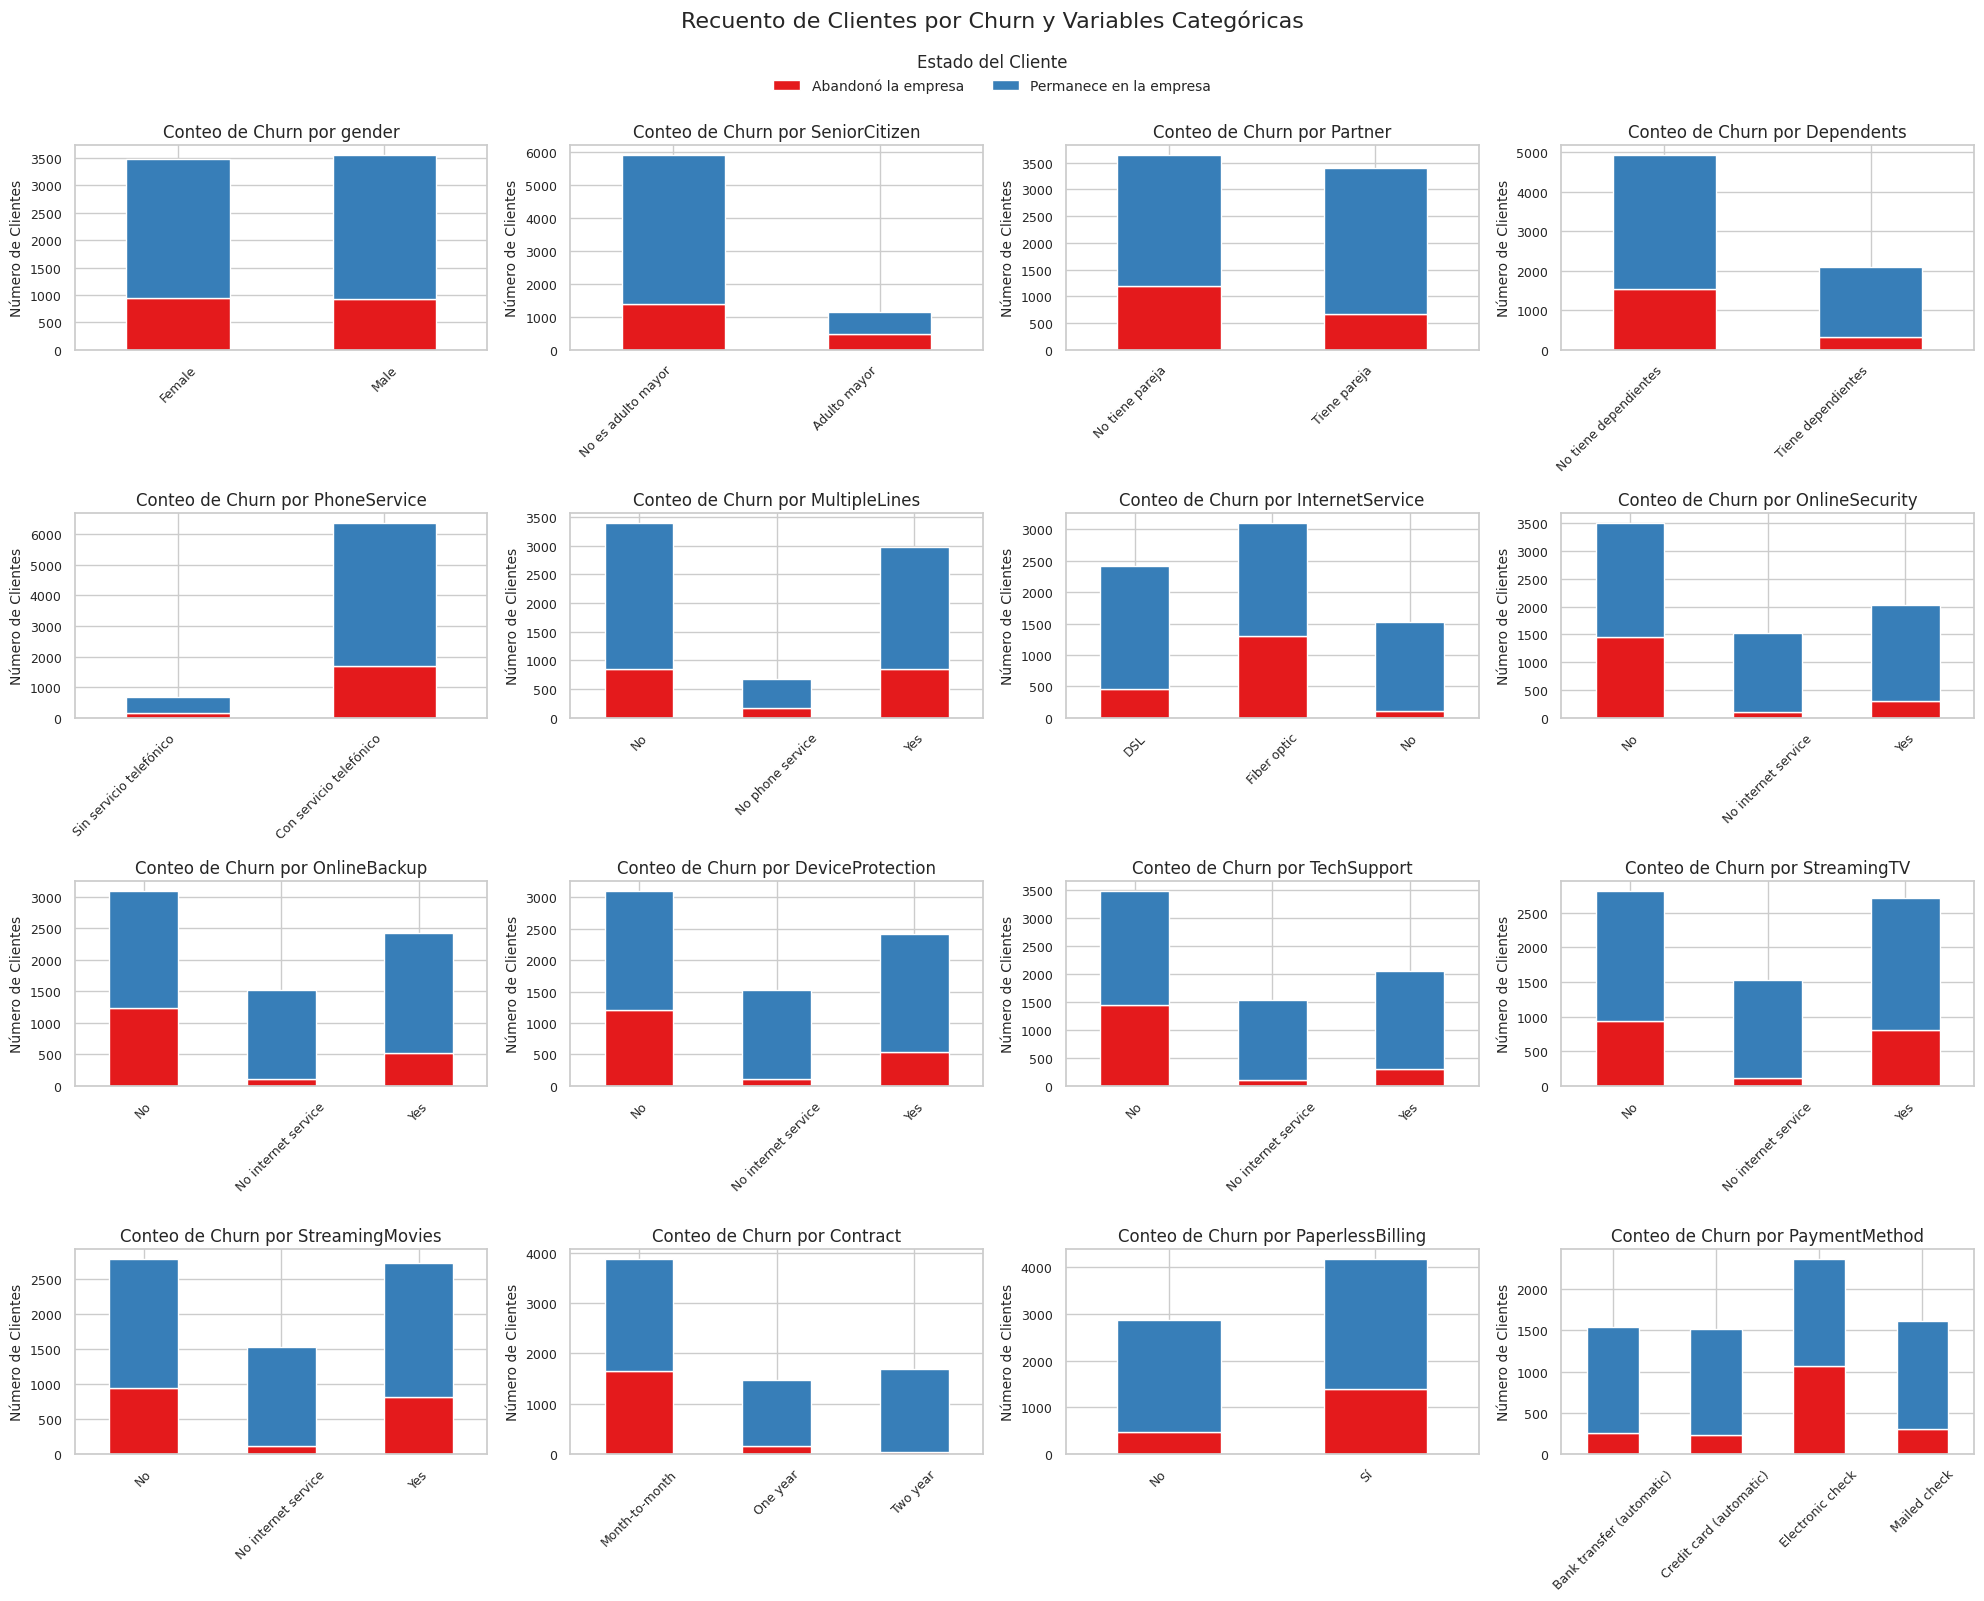

In [18]:
sns.set_theme(style="whitegrid", palette="Set1")

# Lista de variables categóricas a graficar
variablea_categoricas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Diccionario para cambiar las etiquetas de las variables especificadas
etiquetas_personalizadas = {
    'SeniorCitizen': {0: 'No es adulto mayor', 1: 'Adulto mayor'},
    'Partner': {0: 'No tiene pareja', 1: 'Tiene pareja'},
    'Dependents': {0: 'No tiene dependientes', 1: 'Tiene dependientes'},
    'PhoneService': {0: 'Sin servicio telefónico', 1: 'Con servicio telefónico'},
    'PaperlessBilling': {0: 'No', 1: 'Sí'}
}

num_plots = len(variablea_categoricas)
ncols = 4  # Número de columnas para los subplots
nrows = (num_plots + ncols - 1) // ncols # Calcula el número de filas necesario

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))
axes = axes.flatten() # Aplanar el array de ejes para facilitar la iteración

handles = []
labels = []
legend_captured = False

for i, col in enumerate(variablea_categoricas):
    ax = axes[i]
    # Verificar si la columna existe en el dataframe y no es 'Churn' o 'customerID'
    if col in df.columns and col != 'Churn' and col != 'customerID':
        # Usar value_counts() y unstack() para obtener los conteos de churn por categoría
        churn_counts = df.groupby(col, observed=False)['Churn'].value_counts().unstack().fillna(0)

        # Renombrar columnas para mejores etiquetas de leyenda
        churn_counts = churn_counts.rename(columns={0: 'Permanece en la empresa', 1: 'Abandonó la empresa'})

        # Definir el orden de las columnas para el gráfico apilado
        order_columns = ['Abandonó la empresa', 'Permanece en la empresa']
        final_order = [c for c in order_columns if c in churn_counts.columns]
        churn_counts = churn_counts[final_order]

        churn_counts.plot(kind='bar', stacked=True, ax=ax)

        ax.set_title(f'Conteo de Churn por {col}', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('Número de Clientes', fontsize=10)

        # Aplicar etiquetas personalizadas si la columna está en el diccionario
        if col in etiquetas_personalizadas:
            ax.set_xticks(range(len(etiquetas_personalizadas[col])))
            ax.set_xticklabels([etiquetas_personalizadas[col][key] for key in etiquetas_personalizadas[col].keys()], rotation=45, ha='right', fontsize=9)
        else:
            ax.tick_params(axis='x', rotation=45, labelsize=9)

        ax.tick_params(axis='y', labelsize=9)

        # Capturar las manijas y etiquetas de la leyenda solo una vez
        if not legend_captured:
            handles, labels = ax.get_legend_handles_labels()
            legend_captured = True

        # Eliminar la leyenda de cada subplot individual
        ax.get_legend().remove()

# Ocultar subplots no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Añadir una leyenda única para toda la figura
fig.legend(handles, labels, title='Estado del Cliente',
           loc='upper center',
           bbox_to_anchor=(0.5, 0.98),
           ncol=2,
           fontsize=10,
           title_fontsize=12,
           frameon=False
          )

plt.tight_layout(rect=[0, 0, 1, 0.94]) # Ajustar el layout para dejar espacio para el título y la leyenda
fig.suptitle('Recuento de Clientes por Churn y Variables Categóricas', fontsize=16, y=1.0) # Título general
plt.show()
#fig.savefig('categoricas.png', dpi=300, bbox_inches='tight') # Comentado para no guardar la imagen por defecto

En resumen, parece que factores como tener contratos a corto plazo, utilizar ciertos métodos de pago (cheque electrónico), tener servicio de Fibra Óptica y no tener servicios adicionales (seguridad en línea, respaldo, etc.) están asociados con una mayor probabilidad de que un cliente abandone la empresa.

## Conteo de evasión por variables numéricas

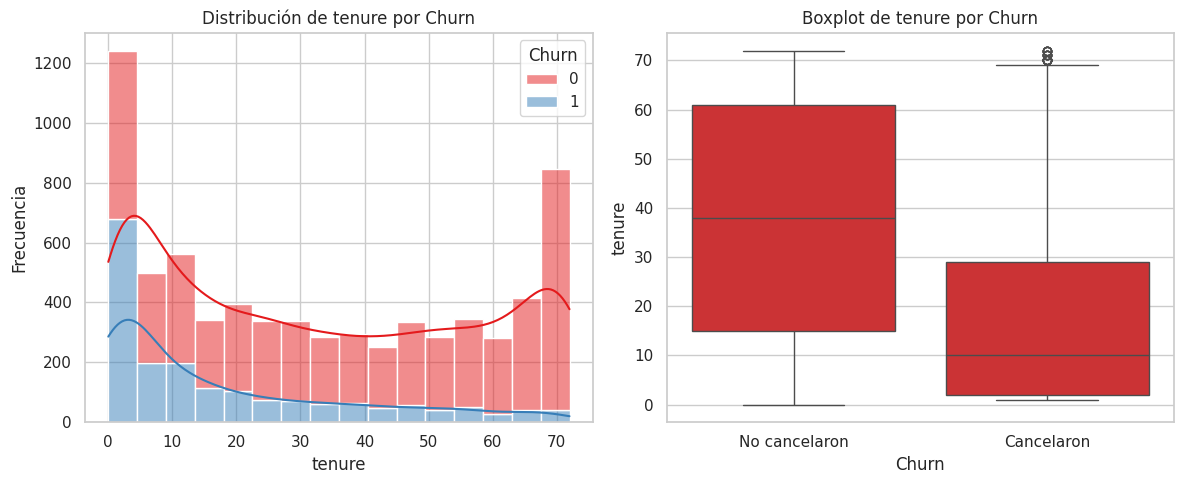

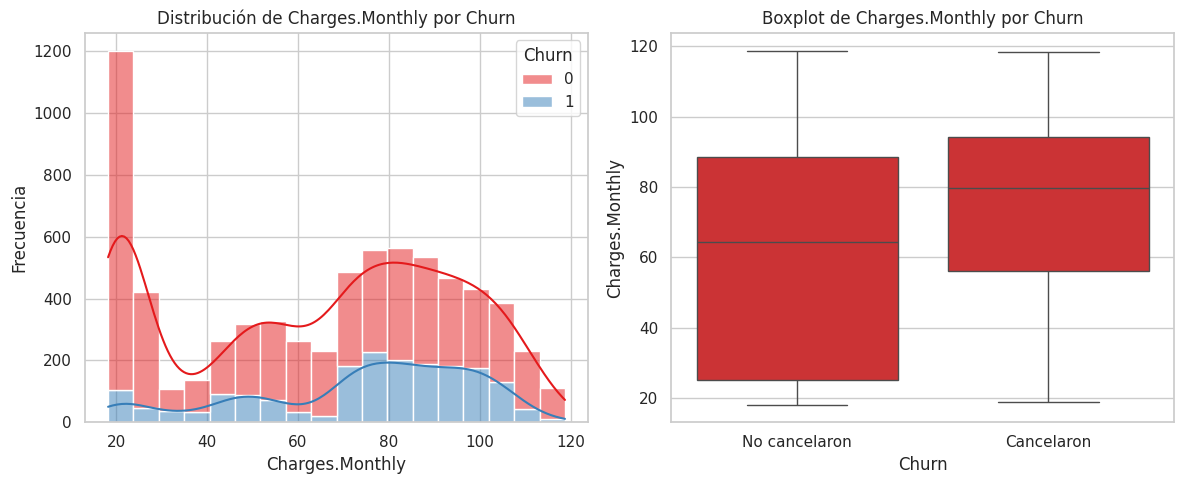

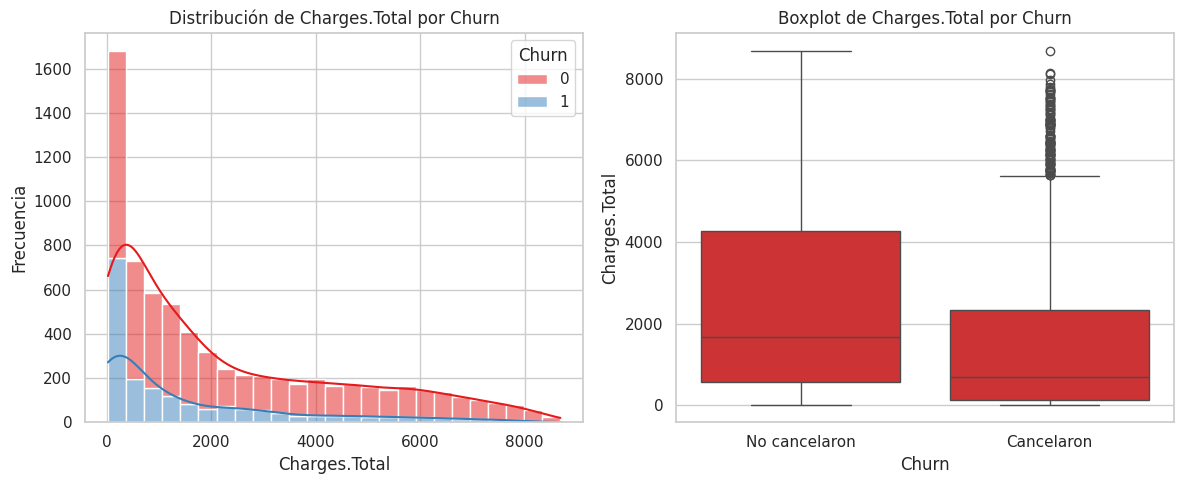

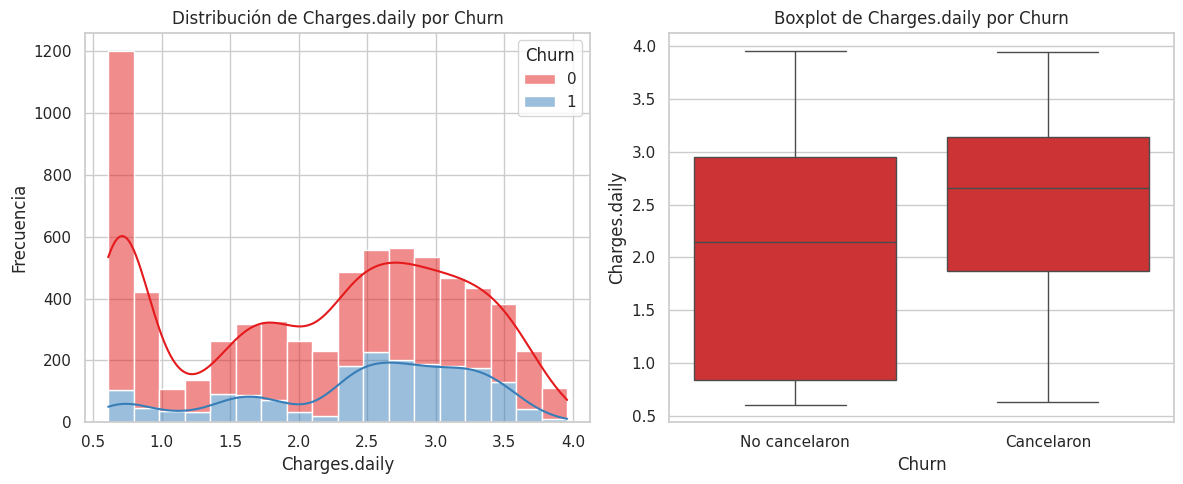

In [19]:
# Lista de variables numéricas a graficar
variables_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.daily']

for col in variables_numericas:
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer plot
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', kde=True)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Boxplot
    plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo plot
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Boxplot de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No cancelaron', 'Cancelaron']) # Set custom labels


    plt.tight_layout()
    plt.show()

En resumen los gráficos de las variables numéricas refuerzan la idea de que la antigüedad del cliente es un factor crucial en el Churn, con los clientes nuevos siendo más propensos a irse. Además, parece que los clientes con cargos mensuales y diarios más altos también tienen una mayor probabilidad de abandonar la empresa.

#📄Informe final

# Informe de Análisis de Churn - TelecomX LATAM

## 📌 Introducción
El presente informe resume el análisis realizado sobre el problema de **evasión de clientes (Churn)** en la empresa **TelecomX LATAM**.  
El objetivo principal fue identificar patrones de comportamiento que permitan comprender las causas por las cuales los clientes abandonan el servicio, con el fin de proponer estrategias orientadas a la **retención y fidelización**.

El **churn** es un desafío clave para empresas de telecomunicaciones, ya que adquirir nuevos clientes suele ser más costoso que retener a los existentes.  
Por ello, un análisis basado en datos ayuda a generar **acciones estratégicas de negocio** fundamentadas en evidencias.

---

## 🔧 Limpieza y Tratamiento de Datos
1. **Extracción de Datos**  
   - Se importaron los datos desde un archivo JSON en GitHub.  
   - Librerías utilizadas: `pandas`, `numpy`, `matplotlib`, `seaborn`.

2. **Tratamiento de Valores Faltantes**  
   - Se identificaron valores nulos principalmente en la variable `TotalCharges`.  
   - Se limpiaron o transformaron para mantener la consistencia.

3. **Estandarización de Tipos de Datos**  
   - Conversión de variables categóricas a tipo `category`.  
   - Normalización de variables numéricas cuando fue necesario.

---

## 📊 Análisis Exploratorio de Datos (EDA)
Durante la fase exploratoria se realizaron análisis descriptivos y visualizaciones para identificar patrones relevantes:

1. **Distribución de Churn**  
   - Se encontró que aproximadamente el **26% de los clientes abandonaron** el servicio.  

2. **Factores Demográficos**  
   - Clientes **mayores de 65 años** y sin dependientes mostraron mayor propensión al churn.  
   - No hubo diferencias significativas por género.

3. **Factores de Servicio**  
   - Los clientes con **contratos de mes a mes** presentan tasas de churn más altas.  
   - Los servicios adicionales (seguridad en línea, soporte técnico, respaldo) reducen el riesgo de abandono.

4. **Facturación**  
   - Los clientes con cargos mensuales altos tuvieron mayor probabilidad de abandonar.  
   - En cambio, contratos a largo plazo distribuyen mejor los costos y disminuyen el churn.

5. **Visualizaciones**  
   - Gráficos de barras para distribución de churn por contrato y servicios.  
   - Diagramas de dispersión para analizar relación entre `tenure`, `MonthlyCharges` y churn.  
   - Mapas de calor (correlaciones entre variables).  

---

## 📌 Conclusiones e Insights
- El **tipo de contrato** es el factor más determinante: contratos de mes a mes tienen la mayor tasa de abandono.  
- Los clientes con **cargos mensuales elevados** son más propensos a irse.  
- La **adopción de servicios adicionales** como soporte técnico o seguridad reduce la evasión.  
- El **tiempo de permanencia (tenure)** está directamente correlacionado con la fidelidad: clientes más antiguos tienden a quedarse.  

Estos hallazgos permiten a la empresa diseñar **estrategias segmentadas de retención**.

---

## 🚀 Recomendaciones Estratégicas
1. **Fomentar contratos a largo plazo** mediante descuentos o beneficios exclusivos.  
2. **Ofrecer paquetes de valor agregado** que incluyan seguridad, soporte y respaldo a precios accesibles.  
3. **Implementar alertas tempranas** para clientes con cargos elevados y baja permanencia, a fin de ofrecer alternativas personalizadas.  
4. **Mejorar la experiencia de servicio** en los primeros meses de contrato, dado que clientes nuevos son más vulnerables al churn.  
5. **Segmentar campañas de retención** por grupos de riesgo (ejemplo: adultos mayores, clientes sin servicios adicionales, usuarios con facturas altas).  

---

## 📑 Cierre
El análisis de churn de **TelecomX LATAM** permitió comprender mejor los patrones de abandono y establecer **bases sólidas para estrategias de retención**.  
Implementar estas recomendaciones puede ayudar a reducir significativamente la evasión y aumentar la **rentabilidad de la compañía**.